In [1]:
import os

os.chdir("../..")

In [12]:
%load_ext autoreload
%autoreload 2

from mars.models_training import data_loading
from mars.models_training.notebook_helpers import evaluate

import pandas as pd
import os
from sklearn.model_selection import train_test_split
import numpy as np
from mars.models_training import document_level_similarity_search


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
X, y = data_loading.load_document_level_issues_dataset(data_loading.DocumenLevelDataset.ethics_ai_ethics, "laser")

100%|██████████| 16/16 [00:48<00:00,  3.04s/it]


In [54]:
df_labels = pd.read_csv('data/labels.csv', index_col=0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Baseline

In [6]:
X_max = list(map(max, X_test))

AUC ROC: 0.5932400932400933


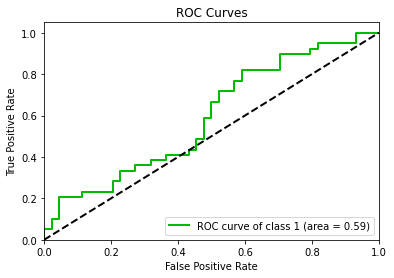

In [11]:
evaluate(X_max, y_test)

In [474]:
def bucketize(scores, bins):
    return np.stack([np.histogram(x, range=(-1, 1), bins=bins)[0] for x in scores])

In [400]:
from sklearn.feature_selection import RFE,RFECV

In [13]:
buckets_num = 250

model = document_level_similarity_search.model
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('functiontransformer', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function bucketize at 0x7eff2157eb70>, inv_kw_args=None,
          inverse_func=None, kw_args={'bins': 50}, pass_y='deprecated',
          validate=False)), ('variancethreshold', VarianceThres...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

AUC ROC: 0.6179815910585141


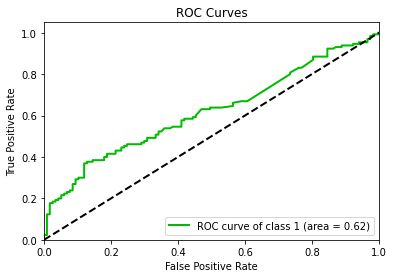

In [67]:
model = document_level_similarity_search.model
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_train)[:, 1]
evaluate(y_pred, y_train)

/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


AUC ROC: 0.6231426692965154


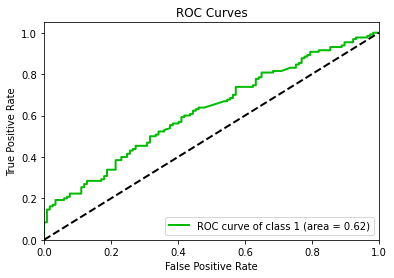

In [73]:
model2 = document_level_similarity_search.model_with_normalization
model2.fit(X_train, y_train)
y_pred = model2.predict_proba(X_train)[:, 1]
evaluate(y_pred, y_train)

/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


AUC ROC: 0.6051282051282051


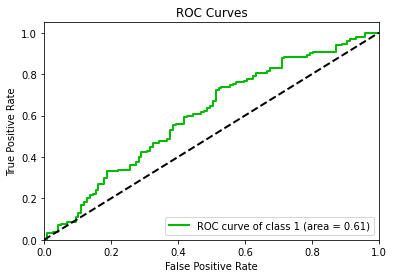

In [84]:
buckets_num = 250

model3 =  document_level_similarity_search.model_with_normalization_rfe
model3.set_params(bucketize__kw_args = {'bins': buckets_num})
model3.fit(X_train, y_train)
y_pred = model3.predict_proba(X_train)[:, 1]
evaluate(y_pred, y_train)

In [90]:
param_grid = {
    "rfe__n_features_to_select": list(range(10,101,5)),
    "bucketize__kw_args":[{"bins":int(n)} for n in np.linspace(50,400,num=40)]
}

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


cv = RandomizedSearchCV(model3, param_grid, scoring="roc_auc",n_jobs=-1, verbose=1)

In [92]:
cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/home/sgizinski/repos/AI-strat

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('bucketize', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function bucketize at 0x7eff6c1d9840>, inv_kw_args=None,
          inverse_func=None, kw_args={'bins': 250}, pass_y='deprecated',
          validate=False)), ('normalize', FunctionTransformer(accept_spa...ty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'rfe__n_features_to_select': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'bucketize__kw_args': [{'bins': 50}, {'bins': 58}, {'bins': 67}, {'bins': 76}, {'bins': 85}, {'bins': 94}, {'bins': 103}, {'bins': 112}, {'bins': 121}, {'bins': 130}, {'bi...s': 346}, {'bins': 355}, {'bins': 364}, {'bins': 373}, {'bins': 382}, {'bins': 391}, {'bins': 400}]},
        

In [93]:
best_model = cv.best_estimator_
cv.best_score_, cv.best_params_

(0.6153353989951297,
 {'rfe__n_features_to_select': 85, 'bucketize__kw_args': {'bins': 103}})

/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


AUC ROC: 0.6432610124917817


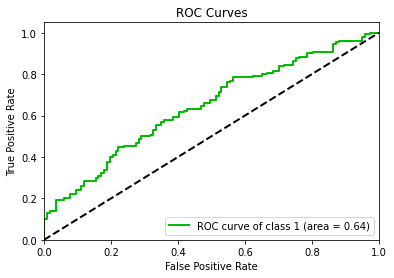

In [97]:
y_pred = best_model.predict_proba(X_train)[:, 1]
evaluate(y_pred, y_train)

/home/sgizinski/repos/AI-strategies-papers-regulations-monitoring/.venv/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


AUC ROC: 0.7511655011655012


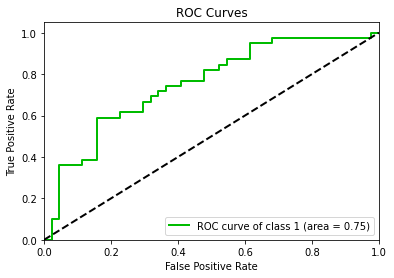

In [98]:
y_pred = best_model.predict_proba(X_test)[:, 1]
evaluate(y_pred, y_test)